## Load and analyze DMPS @ Zeppelin

In [1]:
import dominics_functions as fu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import scipy as sc

# These lines auto-updates the functions in other packages which is useful if these functions are changed. 
%load_ext autoreload
%autoreload 2

In [2]:
path = 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\'

In [3]:
import glob 
glob.glob(path+'\\*')

['C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2010_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2011_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2012_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2013_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2014_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2015_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010

In [4]:
DFs_2010_2020 = fu.load_and_append_2010_2020(path, 
                             name_in_file='DMPS')

['Year', 'Month', 'Day', 'Hour', 'Minute', 'UFCPC', 'CPC3010', 'Ntot', 'unknown4', 'unknown5', 'unknown6', 'unknown7', 'unknown8', '5.0118723e-09', '5.6234133e-09', '6.3095734e-09', '7.0794578e-09', '7.9432823e-09', '8.9125094e-09', '1.0000000e-08', '1.1220185e-08', '1.2589254e-08', '1.4125375e-08', '1.5848932e-08', '1.7782794e-08', '1.9952623e-08', '2.2387211e-08', '2.5118864e-08', '2.8183829e-08', '3.1622777e-08', '3.5481339e-08', '3.9810717e-08', '4.4668359e-08', '5.0118723e-08', '5.6234133e-08', '6.3095734e-08', '7.0794578e-08', '7.9432823e-08', '8.9125094e-08', '1.0000000e-07', '1.1220185e-07', '1.2589254e-07', '1.4125375e-07', '1.5848932e-07', '1.7782794e-07', '1.9952623e-07', '2.2387211e-07', '2.5118864e-07', '2.8183829e-07', '3.1622777e-07', '3.5481339e-07', '3.9810717e-07', '4.4668359e-07', '5.0118723e-07', '5.6234133e-07', '6.3095734e-07', '7.0794578e-07', 'flag']
C:\Users\Lovisa\Documents\Courses II\E_science_tools HT22\Project\DATA_ZEP_2010to2020\DMPS_and_CPC_2010_QA_QC@STP

In [5]:
fu.get_columns_2010_2020?

In [6]:
df_2010_2020 = fu.concat_df_2010_2020(DFs_2010_2020)
dict_years_to_df = {"2010_2020":df_2010_2020}

In [7]:
df_2010_2020.head(30)

,UFCPC,CPC3010,Ntot,5.0118723e-09,5.6234133e-09,6.3095734e-09,7.0794578e-09,7.9432823e-09,8.9125094e-09,1.0000000e-08,...,2.8183829e-07,3.1622777e-07,3.5481339e-07,3.9810717e-07,4.4668359e-07,5.0118723e-07,5.6234133e-07,6.3095734e-07,7.0794578e-07,flag
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03 00:30:00,0.0,192.74387,243.84122,2.808560e-29,2.806373e-29,2.803910e-29,2.801134e-29,2.798005e-29,2.794476e-29,2.790497e-29,...,4.117499e+01,3.098953e+01,2.494957e+01,1.233365e+01,2.245721e+00,2.551309e-02,2.092485e-29,NaN,NaN,0.0
2010-08-03 01:00:00,0.0,193.46634,215.13303,2.808381e-29,2.806194e-29,2.803731e-29,2.800955e-29,2.797826e-29,2.794297e-29,2.790318e-29,...,3.037023e+01,1.631563e+01,1.474994e+01,7.853108e+00,1.110854e+00,1.222512e-02,7.289623e-02,NaN,NaN,0.0
2010-08-03 01:30:00,0.0,171.50623,202.35439,2.807616e-29,2.805429e-29,2.802965e-29,2.800189e-29,2.797060e-29,2.793531e-29,2.789551e-29,...,2.051200e+01,1.639728e+01,8.066267e+00,4.359914e+00,3.408711e+00,3.556573e+00,2.125525e+00,NaN,NaN,0.0
2010-08-03 02:00:00,0.0,150.03288,171.32055,2.806932e-29,2.804744e-29,2.802280e-29,2.799504e-29,2.796374e-29,2.792845e-29,2.788615e-29,...,1.371520e+01,9.214429e+00,4.748312e+00,4.956812e+00,5.186443e+00,1.304189e+00,8.860881e-01,NaN,NaN,0.0
2010-08-03 02:30:00,0.0,133.50656,161.29302,2.806105e-29,2.803917e-29,2.801453e-29,2.798676e-29,2.795546e-29,2.792016e-29,2.788035e-29,...,1.329005e+01,8.655610e+00,8.527594e-01,1.619113e+00,3.022508e+00,6.016886e-02,2.090299e-29,NaN,NaN,0.0
2010-08-03 03:00:00,0.0,214.61315,241.28926,2.805184e-29,2.802996e-29,2.800531e-29,2.797754e-29,2.794624e-29,2.791094e-29,2.787113e-29,...,4.371679e+01,1.560332e+01,1.612432e+01,1.256450e+01,4.945069e+00,7.143874e-02,2.089488e-29,NaN,NaN,0.0
2010-08-08 19:00:00,0.0,138.90447,165.80897,2.803943e-29,2.801754e-29,2.799290e-29,2.796512e-29,2.793381e-29,2.789851e-29,2.785869e-29,...,2.382448e-29,5.995573e-03,3.112935e-01,3.717229e-01,3.355045e-01,6.678864e-03,2.088387e-29,NaN,NaN,0.0
2010-08-08 19:30:00,0.0,206.16524,238.45019,2.803847e-29,2.801658e-29,2.799194e-29,2.796416e-29,2.793286e-29,2.789755e-29,2.785523e-29,...,5.979226e-01,5.385092e-03,3.796642e-01,1.194565e+00,1.509753e+00,3.005454e-02,2.088315e-29,NaN,NaN,0.0
2010-08-08 20:00:00,0.0,163.60616,184.23458,2.803716e-29,2.801528e-29,2.799063e-29,2.796286e-29,2.793155e-29,2.789624e-29,2.785643e-29,...,5.662651e-01,2.336443e-29,2.282781e-29,2.226083e-29,2.557132e-01,2.326950e+00,1.531328e+00,NaN,NaN,0.0


In [37]:
bin_col_names_2010_2020 = ['5.0118723e-09', '5.6234133e-09', '6.3095734e-09',
   '7.0794578e-09', '7.9432823e-09', '8.9125094e-09', '1.0000000e-08',
   '1.1220185e-08', '1.2589254e-08', '1.4125375e-08', '1.5848932e-08',
   '1.7782794e-08', '1.9952623e-08', '2.2387211e-08', '2.5118864e-08',
   '2.8183829e-08', '3.1622777e-08', '3.5481339e-08', '3.9810717e-08',
   '4.4668359e-08', '5.0118723e-08', '5.6234133e-08', '6.3095734e-08',
   '7.0794578e-08', '7.9432823e-08', '8.9125094e-08', '1.0000000e-07',
   '1.1220185e-07', '1.2589254e-07', '1.4125375e-07', '1.5848932e-07',
   '1.7782794e-07', '1.9952623e-07', '2.2387211e-07', '2.5118864e-07',
   '2.8183829e-07', '3.1622777e-07', '3.5481339e-07', '3.9810717e-07',
   '4.4668359e-07', '5.0118723e-07', '5.6234133e-07', '6.3095734e-07',
   '7.0794578e-07']

def get_bins(bin_col_names_2010_2020):
    bin_col_names_2010_2020_floats = [float(i)*10**9 for i in bin_col_names_2010_2020]
    bin_cols = np.around(bin_col_names_2010_2020_floats,decimals=3)
    bin_cols = np.asarray(bin_cols)
    bin_cols = [str(x) for x in bin_cols] # Loop over all list things and change them to str 
    return bin_cols

In [38]:
def renameDpColumns(df_2010_2020, bin_col_names_2010_2020):
    bin_cols = get_bins(bin_col_names_2010_2020)

    # Rename all columns 
    
    dict_cols_to_goodnames = dict(zip(bin_col_names_2010_2020, bin_cols))
   
    df_2010_2020 = df_2010_2020.rename(dict_cols_to_goodnames, axis=1)
    
    return df_2010_2020

In [40]:
df_2010_2020 = renameDpColumns(df_2010_2020, bin_col_names_2010_2020)
df_2010_2020.head(10)

,UFCPC,CPC3010,Ntot,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,281.838,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946,flag
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03 00:30:00,0.0,192.74387,243.84122,2.808560e-29,2.806373e-29,2.803910e-29,2.801134e-29,2.798005e-29,2.794476e-29,2.790497e-29,...,4.117499e+01,3.098953e+01,2.494957e+01,1.233365e+01,2.245721e+00,2.551309e-02,2.092485e-29,NaN,NaN,0.0
2010-08-03 01:00:00,0.0,193.46634,215.13303,2.808381e-29,2.806194e-29,2.803731e-29,2.800955e-29,2.797826e-29,2.794297e-29,2.790318e-29,...,3.037023e+01,1.631563e+01,1.474994e+01,7.853108e+00,1.110854e+00,1.222512e-02,7.289623e-02,NaN,NaN,0.0
2010-08-03 01:30:00,0.0,171.50623,202.35439,2.807616e-29,2.805429e-29,2.802965e-29,2.800189e-29,2.797060e-29,2.793531e-29,2.789551e-29,...,2.051200e+01,1.639728e+01,8.066267e+00,4.359914e+00,3.408711e+00,3.556573e+00,2.125525e+00,NaN,NaN,0.0
2010-08-03 02:00:00,0.0,150.03288,171.32055,2.806932e-29,2.804744e-29,2.802280e-29,2.799504e-29,2.796374e-29,2.792845e-29,2.788615e-29,...,1.371520e+01,9.214429e+00,4.748312e+00,4.956812e+00,5.186443e+00,1.304189e+00,8.860881e-01,NaN,NaN,0.0
2010-08-03 02:30:00,0.0,133.50656,161.29302,2.806105e-29,2.803917e-29,2.801453e-29,2.798676e-29,2.795546e-29,2.792016e-29,2.788035e-29,...,1.329005e+01,8.655610e+00,8.527594e-01,1.619113e+00,3.022508e+00,6.016886e-02,2.090299e-29,NaN,NaN,0.0
2010-08-03 03:00:00,0.0,214.61315,241.28926,2.805184e-29,2.802996e-29,2.800531e-29,2.797754e-29,2.794624e-29,2.791094e-29,2.787113e-29,...,4.371679e+01,1.560332e+01,1.612432e+01,1.256450e+01,4.945069e+00,7.143874e-02,2.089488e-29,NaN,NaN,0.0
2010-08-08 19:00:00,0.0,138.90447,165.80897,2.803943e-29,2.801754e-29,2.799290e-29,2.796512e-29,2.793381e-29,2.789851e-29,2.785869e-29,...,2.382448e-29,5.995573e-03,3.112935e-01,3.717229e-01,3.355045e-01,6.678864e-03,2.088387e-29,NaN,NaN,0.0
2010-08-08 19:30:00,0.0,206.16524,238.45019,2.803847e-29,2.801658e-29,2.799194e-29,2.796416e-29,2.793286e-29,2.789755e-29,2.785523e-29,...,5.979226e-01,5.385092e-03,3.796642e-01,1.194565e+00,1.509753e+00,3.005454e-02,2.088315e-29,NaN,NaN,0.0
2010-08-08 20:00:00,0.0,163.60616,184.23458,2.803716e-29,2.801528e-29,2.799063e-29,2.796286e-29,2.793155e-29,2.789624e-29,2.785643e-29,...,5.662651e-01,2.336443e-29,2.282781e-29,2.226083e-29,2.557132e-01,2.326950e+00,1.531328e+00,NaN,NaN,0.0


In [11]:
# Make a list of all the "real" diameters

GMDs = ['5.0118723e-09', '5.6234133e-09', '6.3095734e-09',
       '7.0794578e-09', '7.9432823e-09', '8.9125094e-09', '1.0000000e-08',
       '1.1220185e-08', '1.2589254e-08', '1.4125375e-08', '1.5848932e-08',
       '1.7782794e-08', '1.9952623e-08', '2.2387211e-08', '2.5118864e-08',
       '2.8183829e-08', '3.1622777e-08', '3.5481339e-08', '3.9810717e-08',
       '4.4668359e-08', '5.0118723e-08', '5.6234133e-08', '6.3095734e-08',
       '7.0794578e-08', '7.9432823e-08', '8.9125094e-08', '1.0000000e-07',
       '1.1220185e-07', '1.2589254e-07', '1.4125375e-07', '1.5848932e-07',
       '1.7782794e-07', '1.9952623e-07', '2.2387211e-07', '2.5118864e-07',
       '2.8183829e-07', '3.1622777e-07', '3.5481339e-07', '3.9810717e-07',
       '4.4668359e-07', '5.0118723e-07', '5.6234133e-07', '6.3095734e-07',
       '7.0794578e-07']
diameterList = [float(i) for i in GMDs]
diameters = np.asarray(diameterList)
print(diameters.shape)

(44,)


In [12]:
dict_years_to_df = fu.resample_dfs(dict_years_to_df, "2010_2020")

In [13]:
df_daily_2010_2020_mean = df_2010_2020.resample('D').mean()

In [14]:
df_daily_2010_2020_median = df_2010_2020.resample('D').median()

In [15]:
#df_daily_2010_2020_median.iloc[0:20, 3:]

In [16]:
#df_daily_2010_2020_mean.iloc[0:20, 3:-1]

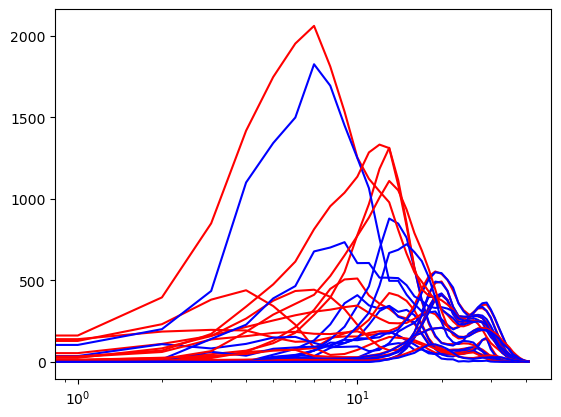

In [17]:
# Plot daily mean distribution
ii = np.arange(0, len(df_daily_2010_2020_mean), 1)

jj = np.arange(7,25,1)

fig, ax = plt.subplots()

for i in jj:
    df_tmp_mean = df_daily_2010_2020_mean.iloc[i, 3:-1].to_frame() # Omit last column with -1 as that is flags
    
    ax.plot(df_tmp_mean.index, df_tmp_mean.values,'r')
    ax.set_xscale('log')
    
    df_tmp_median = df_daily_2010_2020_median.iloc[i,3:-1].to_frame()
    ax.plot(df_tmp_median.index, df_tmp_median.values,'b')
    ax.set_xscale('log')
    
    

## Calculate the bin widths and $N_{tot}$ 

In [18]:
# Check to see that all intervals are equally spaced on a log scale
# np.diff(np.log10(diameters))

In [19]:
# Calculate the bin widths from geometric mean diameters and the total particle number concentration for each year

def calcNtot(diameters, df_daily_2010_2020_median):
    # Create array to store upper bin boudaries
    upperBoundaries = np.empty(0)
    diameter_list = list(diameters)

    # Create array to store the number concentration in each bin
    dNs = np.empty(0)
    upperLimits = []

    for Dp in range(len(diameter_list)-1):

        # Calulate the upper bin from the geo mean of the midpoint diamters as they are equally spaced on a log scale
        upperLimits.append(np.sqrt( diameter_list[Dp] * diameter_list[Dp+1] ) )

    upperLimits = np.array(upperLimits)

    # Calulate the endpoints, ie the first lower limit and the last upper limit
    firstLimit = diameter_list[0]**2 / upperLimits[0] # This is actually the first lower limit, but its needed for the first binwidth
    lastLimit = diameter_list[-1]**2 / upperLimits[-1]

    upperBoundaries = np.insert(upperLimits, 0, firstLimit) 
    upperBoundaries = np.append(upperBoundaries, lastLimit)

    # Calculate dlogDp from the boundaries
    dlogDp = np.log10(upperBoundaries[1:]) - np.log10(upperBoundaries[:-1])

    # Calculate the particle concentration in each bin (dN) by multiplying dNdlogD with dlogD

    lenDiam = len(diameters)
    idx = len(GMDs)-lenDiam+3

    dNdlogDp = df_daily_2010_2020_median.iloc[:,idx:-1]
    dNs = dNdlogDp*(dlogDp)
    ntotCalc = dNs.sum(axis=1)    

    df_daily_2010_2020_median_ntotCalc = df_daily_2010_2020_median.copy(deep = True)
    df_daily_2010_2020_median_ntotCalc['NtotCalc'] = ntotCalc
    return df_daily_2010_2020_median_ntotCalc

In [20]:
df_daily_2010_2020_median_ntotCalc = calcNtot(diameters, df_daily_2010_2020_median)

In [21]:
df_daily_2010_2020_median_ntotCalc

,UFCPC,CPC3010,Ntot,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946,flag,NtotCalc
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03,0.000000,182.125050,208.743710,2.807274e-29,2.805087e-29,2.802623e-29,2.799847e-29,2.796717e-29,2.793188e-29,2.789083e-29,...,15.959473,11.408104,6.404960,3.215610,6.580380e-02,3.644812e-02,NaN,NaN,0.0,195.422265
2010-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2010-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2010-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2010-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,39.203207,0.000487,35.391663,4.856011e-29,4.852284e-29,4.849348e-29,4.847406e-29,4.842079e-29,1.124949e-01,4.242500e+00,...,10.035624,7.545087,4.860186,6.319750,5.246771e+00,4.236436e+00,5.858947e-01,1.829243e+00,0.0,33.047803
2020-12-28,69.460814,0.000492,53.613709,NaN,4.883492e-29,4.898032e-29,4.886053e-29,4.880367e-29,4.892914e-29,2.828007e+00,...,26.608241,20.886540,11.484529,7.620646,6.249617e+00,5.127825e+00,2.445025e+00,1.705581e+00,0.0,49.515386
2020-12-29,31.752139,0.000248,27.017516,NaN,4.924687e-29,4.921681e-29,4.920744e-29,4.915452e-29,3.734622e-01,2.861616e+00,...,8.799040,5.236407,0.004128,0.425705,1.802560e-29,1.766702e-29,1.734943e-29,1.705079e-29,0.0,23.053924


In [22]:
cols = df_daily_2010_2020_median.columns[3:-1]

In [23]:
cols = []

In [24]:
diameter_list = list(diameters) 
df_daily_2010_2020_median[cols]

""
DateTime
2010-08-03
2010-08-04
2010-08-05
2010-08-06
2010-08-07
...
2020-12-27
2020-12-28
2020-12-29


In [25]:
# Check that boundries are correct

# ys = [0,10]

# fig, ax = plt.subplots()
# for i in range(len(diameters)):
#     ls = [diameters[i], diameters[i]]
#     ax.plot(ls,ys,'r:')
#     ax.set_xscale('log')
    
# for i in range(len(upperBoundaries)):
#     ls2 = [upperBoundaries[i],upperBoundaries[i]]
#     ax.plot(ls2,ys,'b')
    


In [26]:
# ls = [diameters[i], diameters[i]]
# print(ls)

Text(0, 0.5, '$N_{tot}$ from DMPS')

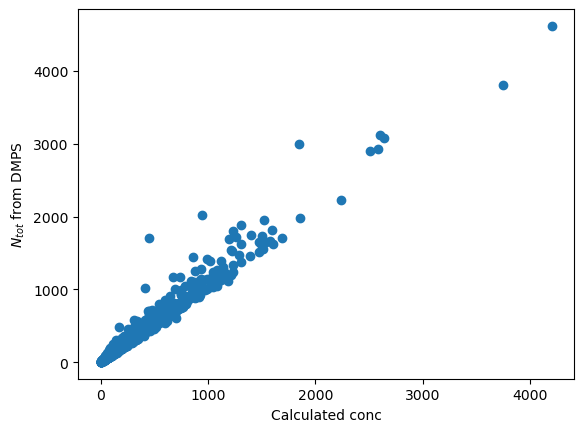

In [27]:
# # Scatter plot the 

plt.plot(df_daily_2010_2020_median_ntotCalc['NtotCalc'].values,df_daily_2010_2020_median_ntotCalc['Ntot'].values ,'o')
plt.xlabel('Calculated conc')
plt.ylabel('$N_{tot}$ from DMPS')


### N_tot from CPC vs calclated N_tot

R-squared: 0.967927


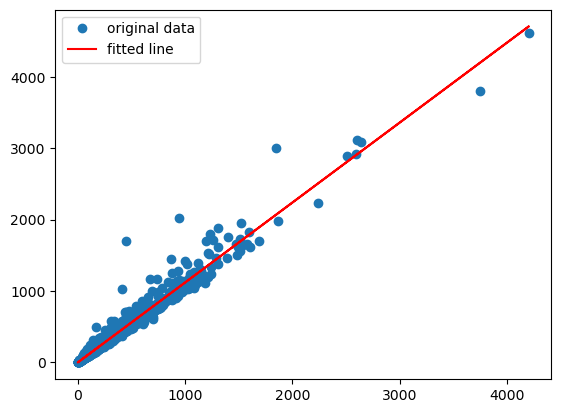

-3.3923359941788362
1.121695266295067


In [28]:
varx = df_daily_2010_2020_median_ntotCalc['NtotCalc'].values
vary = df_daily_2010_2020_median_ntotCalc['Ntot'].values

mask = ~np.isnan(varx) & ~np.isnan(vary)
res = sc.stats.linregress(varx[mask], vary[mask])

print(f"R-squared: {res.rvalue**2:.6f}")

plt.plot(varx,
         vary,
         'o', label='original data')
plt.plot(varx,
         res.intercept + res.slope*varx,
         'r-', label='fitted line')
plt.legend()
plt.show()    
print(res.intercept)
print(res.slope)

In [32]:
# This array will contain the trpezioidal integration of total distribution 
ntot_trap_mean = 9999*np.ones((1,len(df_daily_2010_2020_mean))) 


In [33]:
# diameter_list = list(diameters)
# df_daily_2010_2020_median[cols]

# df_daily_2010_2020_median['diameter_list'].values

## Attempt to integrate with trapezoidal rule to find the ratio $N_{<30}/N_{tot}$

,UFCPC,CPC3010,Ntot,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,281.838,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946,flag
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03,0.000000,182.125050,208.743710,2.807274e-29,2.805087e-29,2.802623e-29,2.799847e-29,2.796717e-29,2.793188e-29,2.789083e-29,...,25.441111,15.959473,11.408104,6.404960,3.215610,6.580380e-02,3.644812e-02,NaN,NaN,0.0
2010-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,39.203207,0.000487,35.391663,4.856011e-29,4.852284e-29,4.849348e-29,4.847406e-29,4.842079e-29,1.124949e-01,4.242500e+00,...,12.961275,10.035624,7.545087,4.860186,6.319750,5.246771e+00,4.236436e+00,5.858947e-01,1.829243e+00,0.0
2020-12-28,69.460814,0.000492,53.613709,NaN,4.883492e-29,4.898032e-29,4.886053e-29,4.880367e-29,4.892914e-29,2.828007e+00,...,30.998753,26.608241,20.886540,11.484529,7.620646,6.249617e+00,5.127825e+00,2.445025e+00,1.705581e+00,0.0
2020-12-29,31.752139,0.000248,27.017516,NaN,4.924687e-29,4.921681e-29,4.920744e-29,4.915452e-29,3.734622e-01,2.861616e+00,...,13.295481,8.799040,5.236407,0.004128,0.425705,1.802560e-29,1.766702e-29,1.734943e-29,1.705079e-29,0.0


In [35]:
# Integrating over all daily median distributions = N_tot daily

# bin_cols = get_bins(bin_col_names_2010_2020)

# def add_trapz_integration(diameters, df_daily_2010_2020_median):
    
#     list_of_areas = []
#     diameter_list = list(diameters)
    
#     for i in np.arange(0,len(df_daily_2010_2020_median)):
#         df_tmp_median = df_daily_2010_2020_median.iloc[i, 3:-1]
        
#         ys = df_tmp_median.values[~np.isnan(df_tmp_median.values)]
#         xs = np.array(diameters[~np.isnan(df_tmp_median.values)])
                
#         trap_tmp = np.trapz(ys, , dx=1.0, axis=- 1)
        
#         # Becuse we integrate over the lognormal distribution, we have to denormalize by multiplying 
#         list_of_areas.append(trap_tmp)
    
#     # Make a copy of dataframe to wich the trapz area is added
#     df_with_added_area = df_daily_2010_2020_median.copy(deep = True)
#     df_with_added_area['area'] = list_of_areas
# return df_with_added_area

SyntaxError: invalid syntax (860957561.py, line 14)

In [ ]:
#df_trapz_area_median = add_trapz_integration(df_daily_2010_2020_median)

In [ ]:
df_daily_2010_2020_median.iloc[1:2,3:-1]

## Compare the trapz integration 
#### (should correspond to the $N_{tot}$ dataframe column)

In [ ]:
# I want to make a scatter plot 


plt.plot(df_trapz_area_median['area'].values, df_trapz_area_median['Ntot'],'o')
plt.xlabel('Trapezoidal area')
plt.ylabel('$N_{tot}$')

In [ ]:
print(1000/0.0001)

## Other

In [ ]:
name_to_start_size_bin = {'2010_2020': 10.0}
name_to_end_size_bin = {'2010_2020':398.107}

xrs_2010_2020 = fu.df_to_xr(dict_years_to_df, '2010_2020', name_to_start_size_bin, name_to_end_size_bin)

In [ ]:
fig = fu.create_colourmesh(xrs_2010_2020)

In [ ]:
additional_2010_2020 = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'UFCPC','CPC3010','Ntot','unknown4','unknown5', 'unknown6',
              'unknown7','unknown8']  
v = [additional_2010_2020[0], additional_2010_2020[8]]

In [ ]:
v